In [1]:
import numpy as np
print(np.__version__)
import sklearn
print(sklearn.__version__)

1.18.1
0.22.1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# Загружаем данные сенсоров
df_database = pd.read_csv('sign_database.csv')

# Загружаем метки классов
sign_classes = pd.read_csv('sign_classes.csv', index_col=0, header=0, names=['id', 'class'])

In [4]:
# Столбец id - идентификаторы "слов"
# Столбец time - метка времени
# Остальные столбцы - показания серсоров для слова id в момент времени time

df_database.head()

x_l       x_r       y_l       y_r       z_l       z_r    roll_l  \
0 -0.097816 -0.127761 -0.029051  0.537977  0.249162  0.508908  0.239445   
1 -0.102460 -0.126734 -0.029230  0.537758  0.246477  0.507236  0.240116   
2 -0.103085 -0.125618 -0.028605  0.537464  0.244890  0.507273  0.234753   
3 -0.102639 -0.126020 -0.028873  0.537306  0.244890  0.507639  0.232072   
4 -0.105139 -0.127538 -0.028917  0.537513  0.244816  0.506626  0.234083   

     roll_r  pitch_l   pitch_r  ...  forefinger_l  forefinger_r  middle_l  \
0  0.039819      0.0  0.007009  ...      0.369149      0.381857  0.570995   
1  0.039057      0.0  0.007009  ...      0.326618      0.402561  0.595044   
2  0.039057      0.0  0.007494  ...      0.295135      0.436131  0.639491   
3  0.026864      0.0  0.009431  ...      0.239311      0.521583  0.723905   
4  0.026864      0.0  0.008947  ...      0.199478      0.675103  0.786566   

   middle_r  ring_l    ring_r  little_l  little_r  id  time  
0  0.343431     0.0  0.000000       0.0  0.133088   0     0  
1  0.291571     0.0  0.000000       0.0  0.084865   0     1  
2  0.242470     0.0  0.000000       0.0  0.026230   0     2  
3  0.224264     0.0  0.014668       0.0  0.015033   0     3  
4  0.235298     0.0  0.010813       0.0  0.000815   0     4  

[5 rows x 24 columns]

In [5]:
# Выберем одно из слов с идентификатором = 0
sign0 = df_database.query('id == 0')\
                   .drop(['id'], axis=1)\
                   .set_index('time')

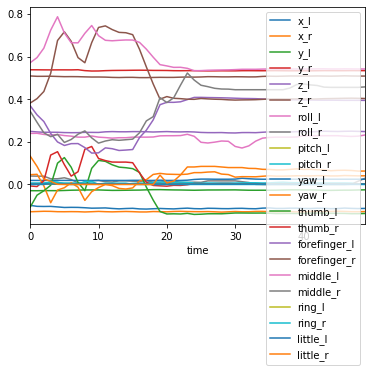

In [6]:
sign0.plot()

In [7]:
## Если не хотите долго ждать - не убирайте комментарии
# from tsfresh.feature_extraction import extract_features
# from tsfresh.feature_selection import select_features
# from tsfresh.utilities.dataframe_functions import impute
# from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, settings, EfficientFCParameters


# sign_features = extract_features(df_database, column_id='id', column_sort='time',
#                                  default_fc_parameters=EfficientFCParameters(),
#                                  impute_function=impute)

# sign_features_filtered = select_features(sign_features, s_classes.loc[:, 'target'])

# filepath = './tsfresh_features_filt.csv.gz'
# sign_features_filtered.to_csv(filepath, compression='gzip')

In [10]:
filepath = './tsfresh_features_filt.csv'
sign_features_filtered = pd.read_csv(filepath)

In [11]:
sign_features_filtered.shape

(2565, 10865)

In [12]:
sign_features_filtered.head()

id  ring_r__maximum  \
0   0         0.014764   
1   1         0.017579   
2   2         0.043917   
3   3         0.000000   
4   4         0.061037   

   ring_r__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"  \
0                                           0.998626                       
1                                           0.017579                       
2                                           0.043917                       
3                                           0.000000                       
4                                           0.061037                       

   ring_r__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"  \
0                                           0.000174                    
1                                           0.000180                    
2                                           0.000737                    
3                                           0.000000                    
4                                           0.001453                    

   ring_r__fft_coefficient__coeff_2__attr_"abs"  \
0                                      0.047854   
1                                      0.045183   
2                                      0.059952   
3                                      0.000000   
4                                      0.402618   

   ring_r__linear_trend__attr_"stderr"  ring_r__quantile__q_0.9  \
0                             0.000034                 0.006166   
1                             0.000027                 0.003599   
2                             0.000092                 0.028252   
3                             0.000000                 0.000000   
4                             0.000127                 0.047034   

   ring_r__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"  \
0                                           0.000423                   
1                                           0.000397                   
2                                           0.001034                   
3                                           0.000000                   
4                                           0.001777                   

   ring_r__standard_deviation  ring_r__variance  ...  \
0                    0.003881          0.000015  ...   
1                    0.003399          0.000012  ...   
2                    0.011921          0.000142  ...   
3                    0.000000          0.000000  ...   
4                    0.017728          0.000314  ...   

   roll_r__large_standard_deviation__r_0.25  \
0                                       1.0   
1                                       0.0   
2                                       0.0   
3                                       1.0   
4                                       0.0   

   roll_r__large_standard_deviation__r_0.45  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   middle_l__symmetry_looking__r_0.35  roll_r__symmetry_looking__r_0.15  \
0                                 1.0                               1.0   
1                                 1.0                               0.0   
2                                 1.0                               0.0   
3                                 1.0                               1.0   
4                                 1.0                               0.0   

   roll_r__symmetry_looking__r_0.2  thumb_l__large_standard_deviation__r_0.25  \
0                              1.0                                        1.0   
1                              0.0                                        1.0   
2                              0.0                                        1.0   
3                              1.0                                        1.0   
4                              0.0              

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [14]:
# Подготовим данные на вход в модель

# признаки
X = sign_features_filtered.values

# классы
enc = LabelEncoder()
enc.fit(sign_classes.loc[:, 'class'])
sign_classes.loc[:, 'target'] = enc.transform(sign_classes.loc[:, 'class'])
y = sign_classes.target.values

In [15]:
# Будем делать кросс-валидацию на 5 фолдов
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

base_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])

base_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='accuracy')

In [17]:
base_cv_scores.mean()

0.917738791423002

In [44]:
# k = range(1, 51) выявило интервал от 12 до 20

k = range(12, 20)
scores = []
scores_dict = dict()

for n in k:
    model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n, svd_solver='randomized', random_state=123)),
    ('clf', KNeighborsClassifier(n_neighbors=9))
])
    score = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    scores.append(score)
    scores_dict[n] = score

In [48]:
scores_list = list(scores_dict.items())

for key, val in scores_list:
    if val > 0.8:
        n_solved = key
        break
        
print(n)

14


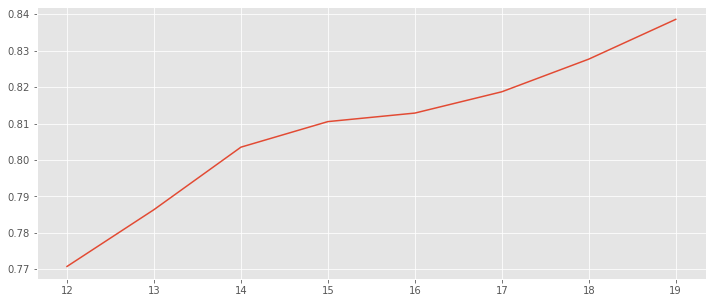

In [47]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
plt.plot(k, scores)

In [59]:
scaler = StandardScaler()
X_normal = scaler.fit_transform(X)
solved_model = PCA(n_components=n_solved, svd_solver='randomized', random_state=123)
solved_model.fit(X_normal)

expl = solved_model.explained_variance_ratio_.sum()
expl = float('{:.2f}'.format(expl))
print(expl)

0.39
